In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [18]:
err = pd.read_csv("train_err_data.csv")
quality = pd.read_csv("train_quality_data.csv")
problem = pd.read_csv("train_problem_data.csv")

## train_err_data
(데이콘 참고)고객이 식기 세척기를 사용하는 중에 오류가 발생하면 상태와 관련 있는 로그만 자동으로 고객서비스 센터로 전송합니다. 이 오류 자동 검출 정보가 train_err_data.csv 입니다.
- 고객번호(user_id) : 제품등록 및 동의 과정에서 자동생성한 Unique한 고객번호
- 오류발생일시(time) : 식기세척기 오류가 발생한 일시
- 모델(model_nm) : 식기세척기 모델명
- 식기세척기 모델 Firmware 버전(fwver) : 식기 세척기를 작동 시키는 내부 프로그램 버전
- 오류유형(errtype) : 네트워크 오류, 전원 오류 등 약 40여종으로 구분되는 오류 유형(대분류)
- 오류유형별 코드(errcode) : 발생된 오류 유형별 코드로 중분류

## train_quality_data
(데이콘 참고)사용자가 식기 세척기를 작동하면서 오류가 발생하면 측정가능한 지표 12가지를 2시간 간격으로 수집하여 자동으로 LG 고객 서비스 센터로 전송됩니다. 이렇게 수집된 정보 828,624건이 제공됩니다.
- 오류 로그 생성일시(time), 
- 식시 세척기 보유 고객번호(user_id), 
- 식기세척기 모델 Firmware 버전(fwver),
- 식시 세척기의 12가지 오류 상태의 발생횟수(quality_0 ~ quality_1)

In [3]:
err.shape

(16554663, 6)

In [4]:
err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [5]:
err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [19]:
print(err.isnull().sum())
err.dropna(axis=0, inplace=True)

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64


In [7]:
np.sort(err.user_id.unique())

array([10000, 10001, 10002, ..., 24997, 24998, 24999], dtype=int64)

In [8]:
np.sort((err.errtype.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [20]:
err.drop(['time', 'model_nm', 'fwver', 'errcode'], axis=1, inplace=True)

In [21]:
temp = err.copy()

In [11]:
temp.groupby(['user_id', 'errtype']).size()

user_id  errtype
10000    3            8
         4          104
         6            1
         7            1
         10           7
                   ... 
24999    13           4
         14          20
         15         135
         16         135
         26          30
Length: 231039, dtype: int64

In [22]:
errtype_list = ['user_id']
for i in range(1, 43):
    errtype_list.append('errtype_' + str(i))
    
df = pd.DataFrame(columns= errtype_list)
df

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42


In [23]:
# row가 너무 많아 시간이 오래 걸려서 일부만 사용
for user in range(10000, 10050):
    user_err_data = []
    
    for errtype in range(1, 43):
        try:
            user_err_data.append(temp.groupby(['user_id', 'errtype']).size()[(user, errtype)])
        except:
            user_err_data.append(0)
            
    df.loc[user - 10000] = [user] + user_err_data
    print(user)

10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049


In [25]:
df.head()

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
0,10000,0,0,8,104,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,53,1,1,0,0,...,10,18,0,1,1,0,0,113,56,1
2,10002,0,0,2,132,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10003,0,0,0,0,2,1,1,0,0,...,8,0,0,1,1,2,0,17,1,0
4,10004,0,0,0,1,0,3,4,0,0,...,16,0,0,1,1,0,0,4,0,2


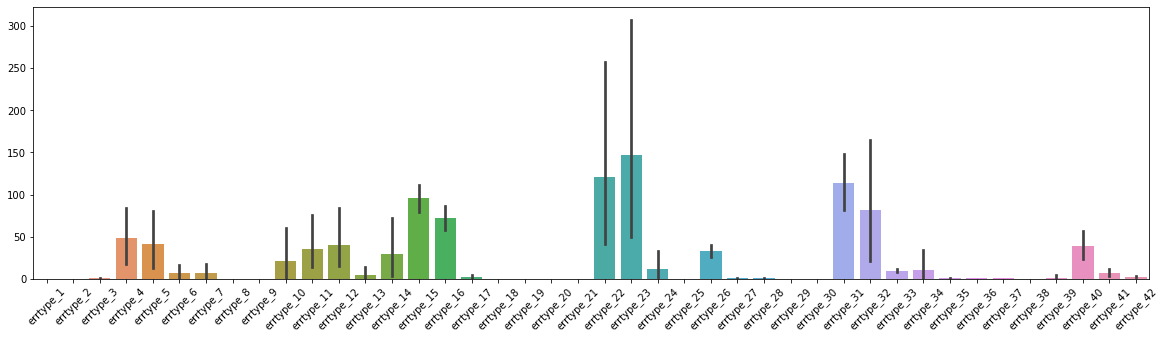

In [143]:
df_plt = df.set_index('user_id')

plt.figure(figsize = (20,5))
plot = sns.barplot(data=df_plt)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [32]:
quality.shape

(828624, 16)

In [34]:
quality.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [35]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [36]:
quality.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [38]:
x = quality[quality['quality_2'].isnull()]
x[x['fwver'].isnull()]
# fwver가 결측치인값 모두 quality_2가 결측치

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
38316,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38317,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38318,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38319,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38320,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828331,20201109232000,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828332,20201109232000,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828333,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0
828334,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0


In [71]:
df_temp = df.copy()
df_temp['err_sum'] = np.nan
df_temp.head()

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,err_sum
0,10000,0,0,8,104,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,10001,0,0,0,0,53,1,1,0,0,...,18,0,1,1,0,0,113,56,1,NaN
2,10002,0,0,2,132,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,10003,0,0,0,0,2,1,1,0,0,...,0,0,1,1,2,0,17,1,0,NaN
4,10004,0,0,0,1,0,3,4,0,0,...,0,0,1,1,0,0,4,0,2,NaN


In [85]:
err_types = []
for i in range(1, 43):
    err_types.append('errtype_' + str(i))

for row in range(0, 50):
    df_temp['err_sum'].iloc[row] = df_temp[err_types].iloc[row].sum()
  
df_temp.err_sum = df_temp.err_sum.astype(int)
df_temp.head()

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,err_sum
0,10000,0,0,8,104,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,317
1,10001,0,0,0,0,53,1,1,0,0,...,18,0,1,1,0,0,113,56,1,2365
2,10002,0,0,2,132,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,306
3,10003,0,0,0,0,2,1,1,0,0,...,0,0,1,1,2,0,17,1,0,306
4,10004,0,0,0,1,0,3,4,0,0,...,0,0,1,1,0,0,4,0,2,777


## train_problem_data
(데이콘 참고)오프라인 매장에 있는 LG 고객서비스 센터 센터에 불만/불편이 접수된 정보인 train_problem_data.csv 가 제공됩니다. 이 파일에는 고객번호(user_id), 불편/불만 발생일시(time)이 제공됩니다.
- 1명의 고객이 여러번 불편/불만을 접수했을 수 있으며, 
- 식기 세척기 오류 자동 검출 정보(train_err_data.csv) 파일에 없는 고객도 불편/불만이 접수될 수 있으며,
- 반대로 식기 세척기 오류 자동 검출 정보(train_err_data.csv)에 오류 기록이 있고 불편/불만 접수를 하는 고객도 있습니다.

In [91]:
problem.head()

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000


In [96]:
users = []
for i in range(10000, 10050):
    users.append(i)

problem_df = pd.DataFrame({'user_id': users, 'problem': 0})
problem_df.head()

,user_id,problem
0,10000,0
1,10001,0
2,10002,0
3,10003,0
4,10004,0


In [100]:
for row in range(0, 50):
    if df_temp['err_sum'].iloc[row] > df_temp.err_sum.mean():
        problem_df['problem'].iloc[row] = 1

problem_df

,user_id,problem
0,10000,0
1,10001,1
2,10002,0
3,10003,0
4,10004,0
5,10005,0
6,10006,0
7,10007,0
8,10008,0
9,10009,1


In [102]:
# test data도 같은 형태로 EDA&FE
test_err = pd.read_csv("test_err_data.csv")
test_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2
2,30000,20201101030228,model_1,04.16.3553,15,1
3,30000,20201101030256,model_1,04.16.3553,22,1
4,30000,20201101030300,model_1,04.16.3553,11,1


In [105]:
print(test_err.isnull().sum())
test_err.dropna(axis=0, inplace=True)

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64


In [115]:
np.sort(test_err.user_id.unique())

array([30000, 30001, 30002, ..., 44996, 44997, 44998], dtype=int64)

In [116]:
np.sort((test_err.errtype.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [117]:
test_err.drop(['time', 'model_nm', 'fwver', 'errcode'], axis=1, inplace=True)

In [118]:
test_temp = test_err.copy()

In [119]:
test_temp.groupby(['user_id', 'errtype']).size()

user_id  errtype
30000    5           62
         6            1
         7            1
         11          16
         12          16
                   ... 
44998    26          34
         31         140
         33          12
         34           7
         40         269
Length: 231241, dtype: int64

In [120]:
test_errtype_list = ['user_id']
for i in range(1, 43):
    test_errtype_list.append('errtype_' + str(i))
    
test_df = pd.DataFrame(columns= errtype_list)
test_df

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42


In [121]:
# row가 너무 많아 시간이 오래 걸려서 일부만 사용
for user in range(30000, 30010):
    test_user_err_data = []
    
    for errtype in range(1, 43):
        try:
            test_user_err_data.append(test_temp.groupby(['user_id', 'errtype']).size()[(user, errtype)])
        except:
            test_user_err_data.append(0)
            
    test_df.loc[user - 30000] = [user] + test_user_err_data
    print(user)

30000
30001
30002
30003
30004
30005
30006
30007
30008
30009


In [127]:
test_df_temp = test_df.copy()
test_df_temp['err_sum'] = np.nan
test_df_temp.head()

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,err_sum
0,30000,0,0,0,0,62,1,1,0,0,...,0,1,3,3,0,2,92,0,2,NaN
1,30001,0,0,3,98,3,4,4,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,30002,0,0,0,0,79,2,1,0,0,...,0,0,1,1,0,14,113,1,2,NaN
3,30003,0,0,0,0,107,2,2,0,0,...,16,3,1,1,0,0,40,8,0,NaN
4,30004,0,0,0,2,6,1,1,0,0,...,6,1,1,1,1,0,48,90,0,NaN


In [130]:
test_err_types = []
for i in range(1, 43):
    test_err_types.append('errtype_' + str(i))

for row in range(0, 10):
    test_df_temp['err_sum'].iloc[row] = test_df_temp[err_types].iloc[row].sum()
  
test_df_temp.err_sum = test_df_temp.err_sum.astype(int)
test_df_temp.head()

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,err_sum
0,30000,0,0,0,0,62,1,1,0,0,...,0,1,3,3,0,2,92,0,2,2750
1,30001,0,0,3,98,3,4,4,0,0,...,0,0,0,0,0,0,0,0,0,284
2,30002,0,0,0,0,79,2,1,0,0,...,0,0,1,1,0,14,113,1,2,941
3,30003,0,0,0,0,107,2,2,0,0,...,16,3,1,1,0,0,40,8,0,371
4,30004,0,0,0,2,6,1,1,0,0,...,6,1,1,1,1,0,48,90,0,881


In [160]:
test_users = []
for i in range(30000, 30010):
    test_users.append(i)

test_problem_df = pd.DataFrame({'user_id': test_users})
test_problem_df.head()

,user_id
0,30000
1,30001
2,30002
3,30003
4,30004


## 선형 회귀

In [182]:
X_train, X_test, y_train, y_test = df_temp, test_df_temp, problem_df['problem'], test_problem_df['user_id']

print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (50, 44)
training response size: (50,)
test predictors size: (10, 44)
test response size: (10,)


In [210]:
pred = logistic.predict(test_df_temp)

In [211]:
test_problem_df["problem"] = pred
test_problem_df

,user_id,problem
0,30000,0
1,30001,0
2,30002,0
3,30003,0
4,30004,0
5,30005,1
6,30006,0
7,30007,0
8,30008,0
9,30009,0
